# *Sentiment Analysis of Movie Reviews*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from typing import List, Tuple, Dict

In [2]:
Data = List[Tuple[str, int]]
def load_data(path: str) -> Data:
  data = open(path, encoding='latin-1').read().splitlines() 
  training_data: Data = []
  for sentence in data:
    training_data.append((sentence[3:], int(sentence[:2])))
  return training_data

### Benchmarking load_data function

In [3]:
import timeit
timeit.timeit("load_data('polarity.train')", globals=locals(), number=1000)

1.287033023000049

### Load training data

In [4]:
training_data = load_data('polarity.train')

### Represent $\phi(x)$ as mapping from word $x$ to number of times it appears in the sentence, $\phi(x) = \{x_1: n_1, x_2: n_2, \dots, x_n: n_n\}$

In [5]:
def extractFeatures(s: str) -> Dict[str, int]:
  return {w: s.count(w) for w in set(s.split())}

phi = extractFeatures('random string with repetititions that are random')
phi

{'with': 1, 'are': 1, 'random': 2, 'string': 1, 'repetititions': 1, 'that': 1}

### Dot product of two sparse vectors

In [6]:
SparseVector = Dict[str, int]

def dotProduct(v1: SparseVector, v2: SparseVector):
  if len(v1) < len(v2):
    return sum(v1[k]*v2[k] for k in v1 if k in v2)
  else: 
    return sum(v1[k]*v2[k] for k in v2 if k in v1)

v1 = {'bye': 4, 'cool': 3}
v2 = {'hello': 1, 'bye': 2, 'cool': 3}
print(dotProduct(v2, v1))

17


### Increment weights

In [7]:
def increment(weights: SparseVector, scale: float, v: SparseVector):
  for k in v:
    if k in weights:
      weights[k] += scale * v[k]
    else:
      weights[k] = scale * v[k]

# Quick mafs

In [66]:
weights = {} # features=>weights or more simply words=>weights
eta = 0.01

for t in range(20):
  for x, y in training_data:
    phi = extractFeatures(x)
    tmp = dotProduct(weights, phi) * y
    if tmp < 1:
      increment(weights, -eta*-y, phi)
 

In [67]:
with open('weights.txt', 'w') as f:
  sorted_weights = sorted(weights, key=weights.get)
  for word in sorted_weights:
    f.write(word + ' ' + str(weights[word]) + '\n')

### Predict the sentiment of a sentence

In [114]:
def predict(x: str):
  phi = extractFeatures(x)
  if dotProduct(weights, phi) < 0:
    return -1
  else:
    return 1

predict('This has a positive score, very good')

1

### Evalute the predictor

The error rate is:  0.04248733821046708
[-1.2400000000000009, -0.07, 0.09999999999999999]
['boring', 'veljohnson', 'dong']


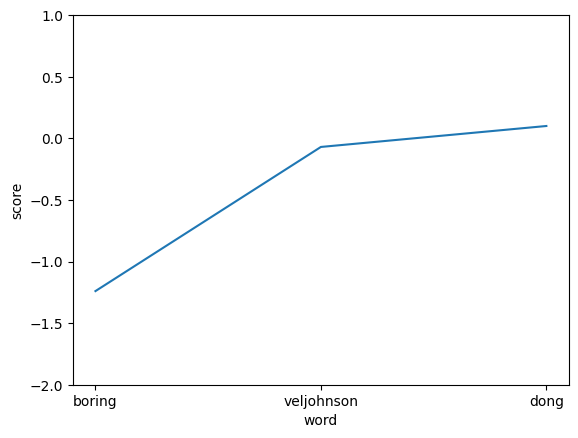

In [187]:
def evaluatePredictor(examples, predictor): 
  error = 0
  for x, y in examples:
    if predictor(x) != y:
      error += 1
  return error / len(training_data)

mean_error = evaluatePredictor(training_data, predict)
print('The error rate is: ', mean_error)

y_array = []
xs = sorted_weights[::4000]
for my_x in xs:
  y_array.append(weights[my_x])

print(y_array)
print(xs)

plt.ylim(ymax=1, ymin=-2)
plt.ylabel('score')
plt.xlabel('word')
plt.plot(xs, y_array)